In [ ]:
# this imports the data from the file "web_analytics_data.csv"

import pandas as pd

df = pd.read_csv('web_analytics_data.csv')
print(df.head)


<bound method NDFrame.head of         Source / Medium  Year  Month of the year    Users New Users Sessions  \
0                     A  2019                 11  126,870   104,020  194,667   
1                     A  2020                  5  120,625    98,574  194,114   
2                     A  2019                 10  123,361   104,308  181,175   
3                     A  2019                  9  106,551    88,428  170,329   
4                     A  2020                  6  102,123    82,461  163,446   
..                  ...   ...                ...      ...       ...      ...   
245                  AA  2020                  5      111        97      131   
246                   K  2020                  2      112        81      130   
247                  JJ  2019                 12      117        90      129   
248                   K  2020                  3      111        70      127   
249  euromessage / push  2020                  5       99         1      125   

    Bounc

In [ ]:
# Finding the null values. If the there is a null, the table will say "true". If there is data, the table will say false

null_values = df.isnull()
print(null_values)

     Source / Medium   Year  Month of the year  Users  New Users  Sessions  \
0              False  False              False  False      False     False   
1              False  False              False  False      False     False   
2              False  False              False  False      False     False   
3              False  False              False  False      False     False   
4              False  False              False  False      False     False   
..               ...    ...                ...    ...        ...       ...   
245            False  False              False  False      False     False   
246            False  False              False  False      False     False   
247            False  False              False  False      False     False   
248            False  False              False  False      False     False   
249            False  False              False  False      False     False   

     Bounce Rate  Pageviews  Avg. Session Duration  Conversion 

In [ ]:

# This counts the number of nulls in each category of the table
null_counts = df.isnull().sum()
print(null_counts)



Source / Medium          0
Year                     0
Month of the year        0
Users                    0
New Users                0
Sessions                 0
Bounce Rate              0
Pageviews                0
Avg. Session Duration    0
Conversion Rate (%)      0
Transactions             0
Revenue                  0
Quantity Sold            0
dtype: int64


In [ ]:
# This states the type of data in each category in the table

print(df.dtypes)

In [ ]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('web_analytics_data.csv')
print(df.head)  # View the first few rows of the data

# Find missing values (null values)
null_values = df.isnull()
print(null_values)  # Shows True for missing values, False for data

# Count missing values per column
null_counts = df.isnull().sum()
print(null_counts)  # Shows the number of missing values in each column

# Check data types of each column
print(df.dtypes)  # Shows the data type (e.g., integer, string) of each column

# Exclude specific columns from conversion to integer
exclude_cols = ['Bounce Rate', 'Avg. Session Duration', 'Conversion Rate (%)', 'Source / Medium']

# Convert columns to numeric format (excluding specified columns)
for col in df.columns:
    if col not in exclude_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64', errors='ignore')

# Convert "Conversion Rate (%)" to float and remove percentage sign
if df['Conversion Rate (%)'].dtype == object:
    df['Conversion Rate (%)'] = df['Conversion Rate (%)'].str.rstrip('%').astype('float64', errors='ignore')
elif df['Conversion Rate (%)'].dtype != 'float64':
    df['Conversion Rate (%)'] = df['Conversion Rate (%)'].astype('float64', errors='ignore')

# Check the updated data types
print(df.dtypes)  # Verify if conversions were successful


In [ ]:
# Group data by month
grouped_by_month = df.groupby(df['Month of the year'])

# Calculate average users per month
average_users_per_month = grouped_by_month['Users'].mean()

# Find the month with the highest number of users
month_highest_users = average_users_per_month.idxmax()
highest_average_users = average_users_per_month.max()

# Print the results
print("Average Users per Month:")
print(average_users_per_month)

print(f"\nMonth with Highest Users: {month_highest_users} (Average: {highest_average_users:.2f})")


In [ ]:
# Group data by month

grouped_by_month = df.groupby(df['Month of the year'])


# Calculate total new users per month

total_new_users_per_month = grouped_by_month['New Users'].sum()


# Print total new users per month

print("Total New Users per Month:")
print(total_new_users_per_month, end="\n\n")

# Alternative: Calculate growth in Users compared to previous month

# Shift Users data by 1 month (assuming data starts from month 1)

shifted_users = df['Users'].shift(1)


# Calculate user growth per month (ignoring first month due to missing previous data)

user_growth_per_month = df['Users'] - shifted_users[1:]  # Exclude the first month (index 0)


# Print user growth per month

print("Growth in Users per Month (compared to previous month):")
print(user_growth_per_month[1:], end="\n\n")  # Exclude the first month (index 0)


# Find the month with the highest new users (or user growth)

if 'New Users' in df.columns:
  month_highest_new_users = total_new_users_per_month.idxmax()
  highest_new_users = total_new_users_per_month.max()
else:
  month_highest_new_users = user_growth_per_month.idxmax()
  highest_new_users = user_growth_per_month.max()


# Print the results

print(f"Month with Highest New Users: {month_highest_users} (Count: {highest_new_users})")


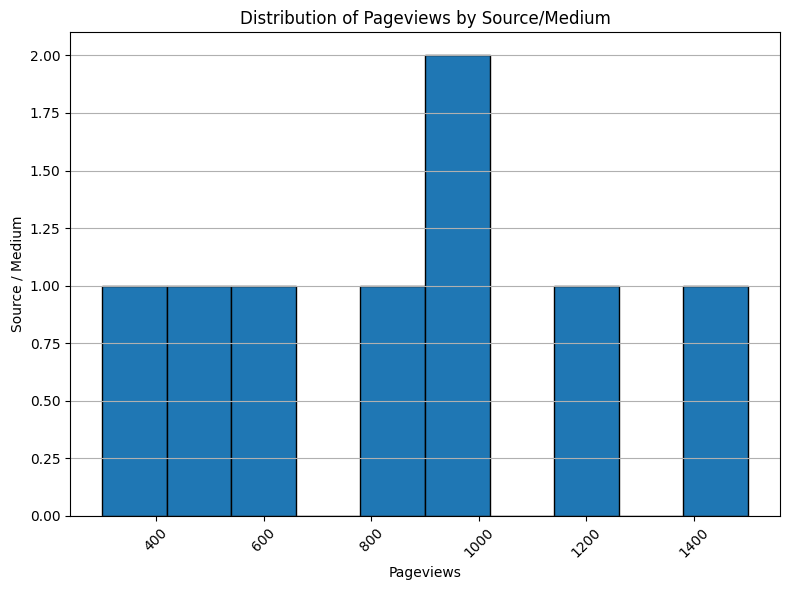

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (assuming 'Source/Medium' and 'Pageviews' columns exist)
data = {
    'Source/Medium': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],  # Modified to have the same length as 'Pageviews'
    'Pageviews': [1200, 500, 800, 1500, 300, 1000, 600, 900]
}

df = pd.DataFrame(data)

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Pageviews'], bins=10, edgecolor='black')
plt.xlabel('Pageviews')
plt.ylabel('Frequency')
plt.title('Distribution of Pageviews by Source/Medium')
plt.grid(axis='y')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()